In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data = data.dropna()
X_train, X_test, y_train, y_test = train_test_split(data['LIMIT_BAL'].values.reshape(-1,1),data['default payment next month'].values,test_size=0.2,random_state=24)
model = LogisticRegression()


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [35]:
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [36]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
pred_prob = model.predict_proba(X_test)

In [38]:
pred_prob

array([[0.74826949, 0.25173051],
       [0.5842971 , 0.4157029 ],
       [0.7960448 , 0.2039552 ],
       ...,
       [0.5842971 , 0.4157029 ],
       [0.82721525, 0.17278475],
       [0.66393453, 0.33606547]])

In [28]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [39]:
# FOR THE LIMIT BALANCE
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_prob[:,1])

0.6201990844642832

In [32]:
#FOR THE EDUCATION FEATURE
X_train, X_test, y_train, y_test = train_test_split(data['EDUCATION'].values.reshape(-1,1),data['default payment next month'].values,test_size=0.2)
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)
roc_auc_score(y_test, pred_prob[:,1])

0.5313959134304931

_________________________________________________________________________
**Now, plot the ROC curve.**


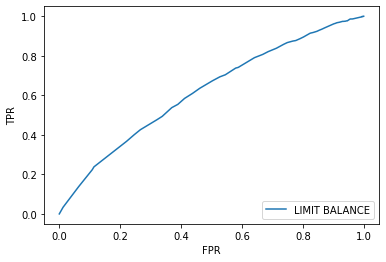

In [45]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob[:,1])
plt.plot(fpr,tpr,label="LIMIT BALANCE")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [46]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, pred_prob[:,1])
print("The average precision recall score is:",average_precision)

The average precision recall score is: 0.29824891448211244


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


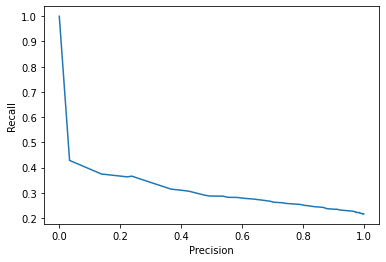

In [47]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
precision, recall, thresh = precision_recall_curve(y_test, pred_prob[:,1])
plt.plot(recall,precision)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [49]:
metrics.auc(recall,precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [50]:
mod = model.predict_proba(X_train)
metrics.roc_auc_score(y_train,mod[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?


The ROC AUC of both the test and training set is approximately close to each other